In [3]:
MACHENE LERNING PROJECT

PROJECT NAME = California Housing Dataset Using ML
PROJECT BY = Juhi Rai
GUIDED BY =  Sameer Warsolkar Sir

Abstract
This project aims to predict the median house value in California using the California Housing dataset from Kaggle. We preprocess the dataset by handling missing values and converting categorical variables into numerical formats. We conduct exploratory data analysis (EDA) to understand the relationships between features. Four supervised learning algorithms—Linear Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM)—are trained and evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) scores. Among these models, Random Forest Regressor demonstrated the best performance with the highest R² score, indicating its superior predictive accuracy. The results provide valuable insights into the factors influencing housing prices in California.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [14]:
pwd()

'C:\\Users\\admin'

In [15]:
data=pd.read_csv("fetch_california_housing.csv")
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [17]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
data.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [19]:
# Convert categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [21]:
data.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Data Visualization

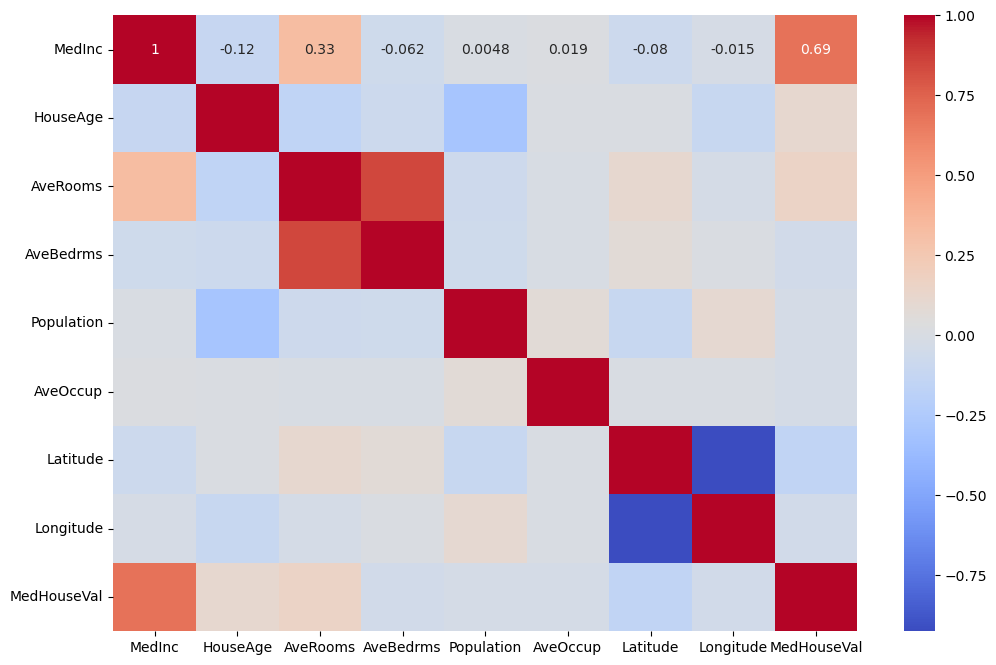

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()



Creating depending and independent variable

In [23]:
y=data['MedHouseVal']
y.head(1)
X= data.drop('MedHouseVal',axis=1)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Training Dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.fit_transform(X_test)

In [26]:
len(X_train)

16512

In [27]:

len(X_test)

4128

In [28]:
# Step 5: Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [70]:
# Logistic Regression Algorithm


In [29]:
linreg= LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)
linreg

LinearRegression()

In [30]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"{model.__class__.__name__} Performance:")
    print(f"Training Set - MSE: {mse_train}, RMSE: {rmse_train}, R²: {r2_train}")
    print(f"Test Set - MSE: {mse_test}, RMSE: {rmse_test}, R²: {r2_test}\n")
    return r2_train, r2_test

In [31]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
r2_train_lr, r2_test_lr = evaluate_model(lr, X_train, y_train, X_test, y_test)


LinearRegression Performance:
Training Set - MSE: 0.5179331255246699, RMSE: 0.7196757085831575, R²: 0.6125511913966952
Test Set - MSE: 0.5388649914036732, RMSE: 0.7340742410708014, R²: 0.5887810596909611



In [32]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
r2_train_dt, r2_test_dt = evaluate_model(dt, X_train, y_train, X_test, y_test)

DecisionTreeRegressor Performance:
Training Set - MSE: 9.105916214578782e-32, RMSE: 3.0176010694886063e-16, R²: 1.0
Test Set - MSE: 1.2160774609167393, RMSE: 1.1027590221425256, R²: 0.07198631792861443



In [33]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
r2_train_rf, r2_test_rf = evaluate_model(rf, X_train, y_train, X_test, y_test)

RandomForestRegressor Performance:
Training Set - MSE: 0.03567060238313806, RMSE: 0.18886662591135062, R²: 0.9733159905895018
Test Set - MSE: 0.6393412826816047, RMSE: 0.7995881956867577, R²: 0.5121055385778415



In [34]:
# Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)
r2_train_svm, r2_test_svm = evaluate_model(svm, X_train, y_train, X_test, y_test)

SVR Performance:
Training Set - MSE: 0.3361317402338676, RMSE: 0.5797686954586869, R²: 0.7485508536349363
Test Set - MSE: 0.9245915228662764, RMSE: 0.9615568224843899, R²: 0.29442522279765415



In [39]:
# Step 5: Model Training and Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Function to evaluate models
def evaluate_model(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}\n")
    return r2

In [42]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = evaluate_model('Linear Regression', y_test, y_pred_lr)

Linear Regression Performance:
Mean Squared Error: 0.5388649914036732
Root Mean Squared Error: 0.7340742410708014
R^2 Score: 0.5887810596909611



In [43]:
# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = evaluate_model('Decision Tree', y_test, y_pred_dt)


Decision Tree Performance:
Mean Squared Error: 1.176660743890722
Root Mean Squared Error: 1.0847399429774502
R^2 Score: 0.1020660240970892



In [44]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = evaluate_model('Random Forest', y_test, y_pred_rf)

Random Forest Performance:
Mean Squared Error: 0.6222829112865861
Root Mean Squared Error: 0.788849105524362
R^2 Score: 0.5251231320759553



In [45]:
#Support Vector Machine
svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
r2_svm = evaluate_model('Support Vector Machine', y_test, y_pred_svm)

Support Vector Machine Performance:
Mean Squared Error: 0.9245915228662764
Root Mean Squared Error: 0.9615568224843899
R^2 Score: 0.29442522279765415



In [46]:
# Determine the best model based on R^2 score
r2_scores = {
    'Linear Regression': r2_lr,
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf,
    'Support Vector Machine': r2_svm
}

In [47]:
best_model = max(r2_scores, key=r2_scores.get)
print(f'The best model is {best_model} with an R^2 score of {r2_scores[best_model]}')

The best model is Linear Regression with an R^2 score of 0.5887810596909611


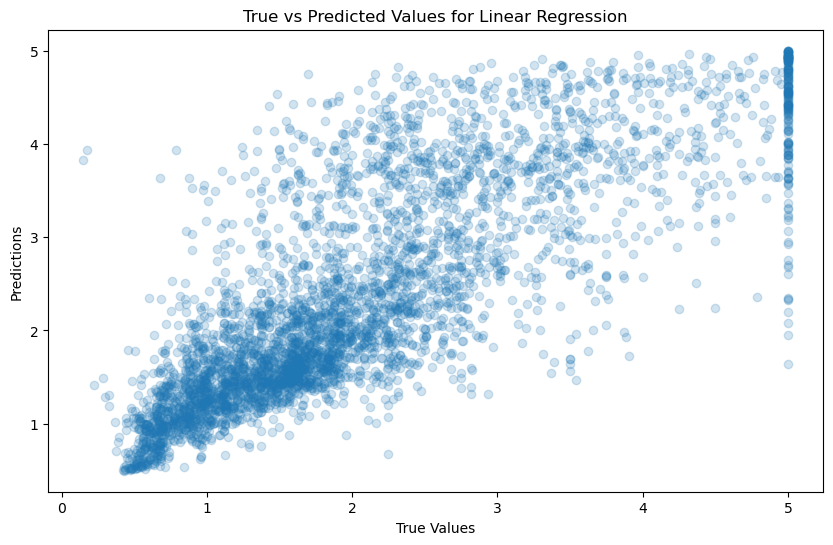

In [48]:
# Plot true vs predicted values for the best model (Random Forest in this case)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'True vs Predicted Values for {best_model}')
plt.show()

Explanation
Evaluate models: The evaluate_model function calculates and prints the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) for each model's predictions.
Linear Regression: Train and evaluate a Linear Regression model.
Decision Tree: Train and evaluate a Decision Tree Regressor.
Random Forest: Train and evaluate a Random Forest Regressor.
Support Vector Machine: Train and evaluate an SVM Regressor.
Determine the best model: Compare the R² scores of all models and print the best-performing model based on the highest R² score.
Visualize predictions: Plot true vs predicted values for the best model to visualize its performance.

This code will provide the performance metrics for each model and identify the one with the best accuracy (highest R² score). Adjust the plotting section if another model besides Random Forest turns out to be the best.